<a href="https://colab.research.google.com/github/Aladdin60/Project-Silver-swift/blob/main/prophet%20time%20series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Date                       datetime64[ns]
Cash Flow                         float64
Revenue/Sales                     float64
Total Income                      float64
Tax                               float64
Net Profit                        float64
Accounts Receivable               float64
Accounts Payable                  float64
Total Expenditure                 float64
Interest                          float64
GDP Growth                        float64
Inflation/Interest Rate           float64
Expenses                          float64
Cap. Expenditure                  float64
Seasonality                       float64
Client Payment Trends             float64
EBIT                              float64
dtype: object
Number of duplicates: 0
                             Date    Cash Flow  Revenue/Sales  Total Income  \
count                        1000  1000.000000    1000.000000   1000.000000   
mean   2021-12-22 14:13:55.200000     4.163249     264.848975    410.625436   
min        

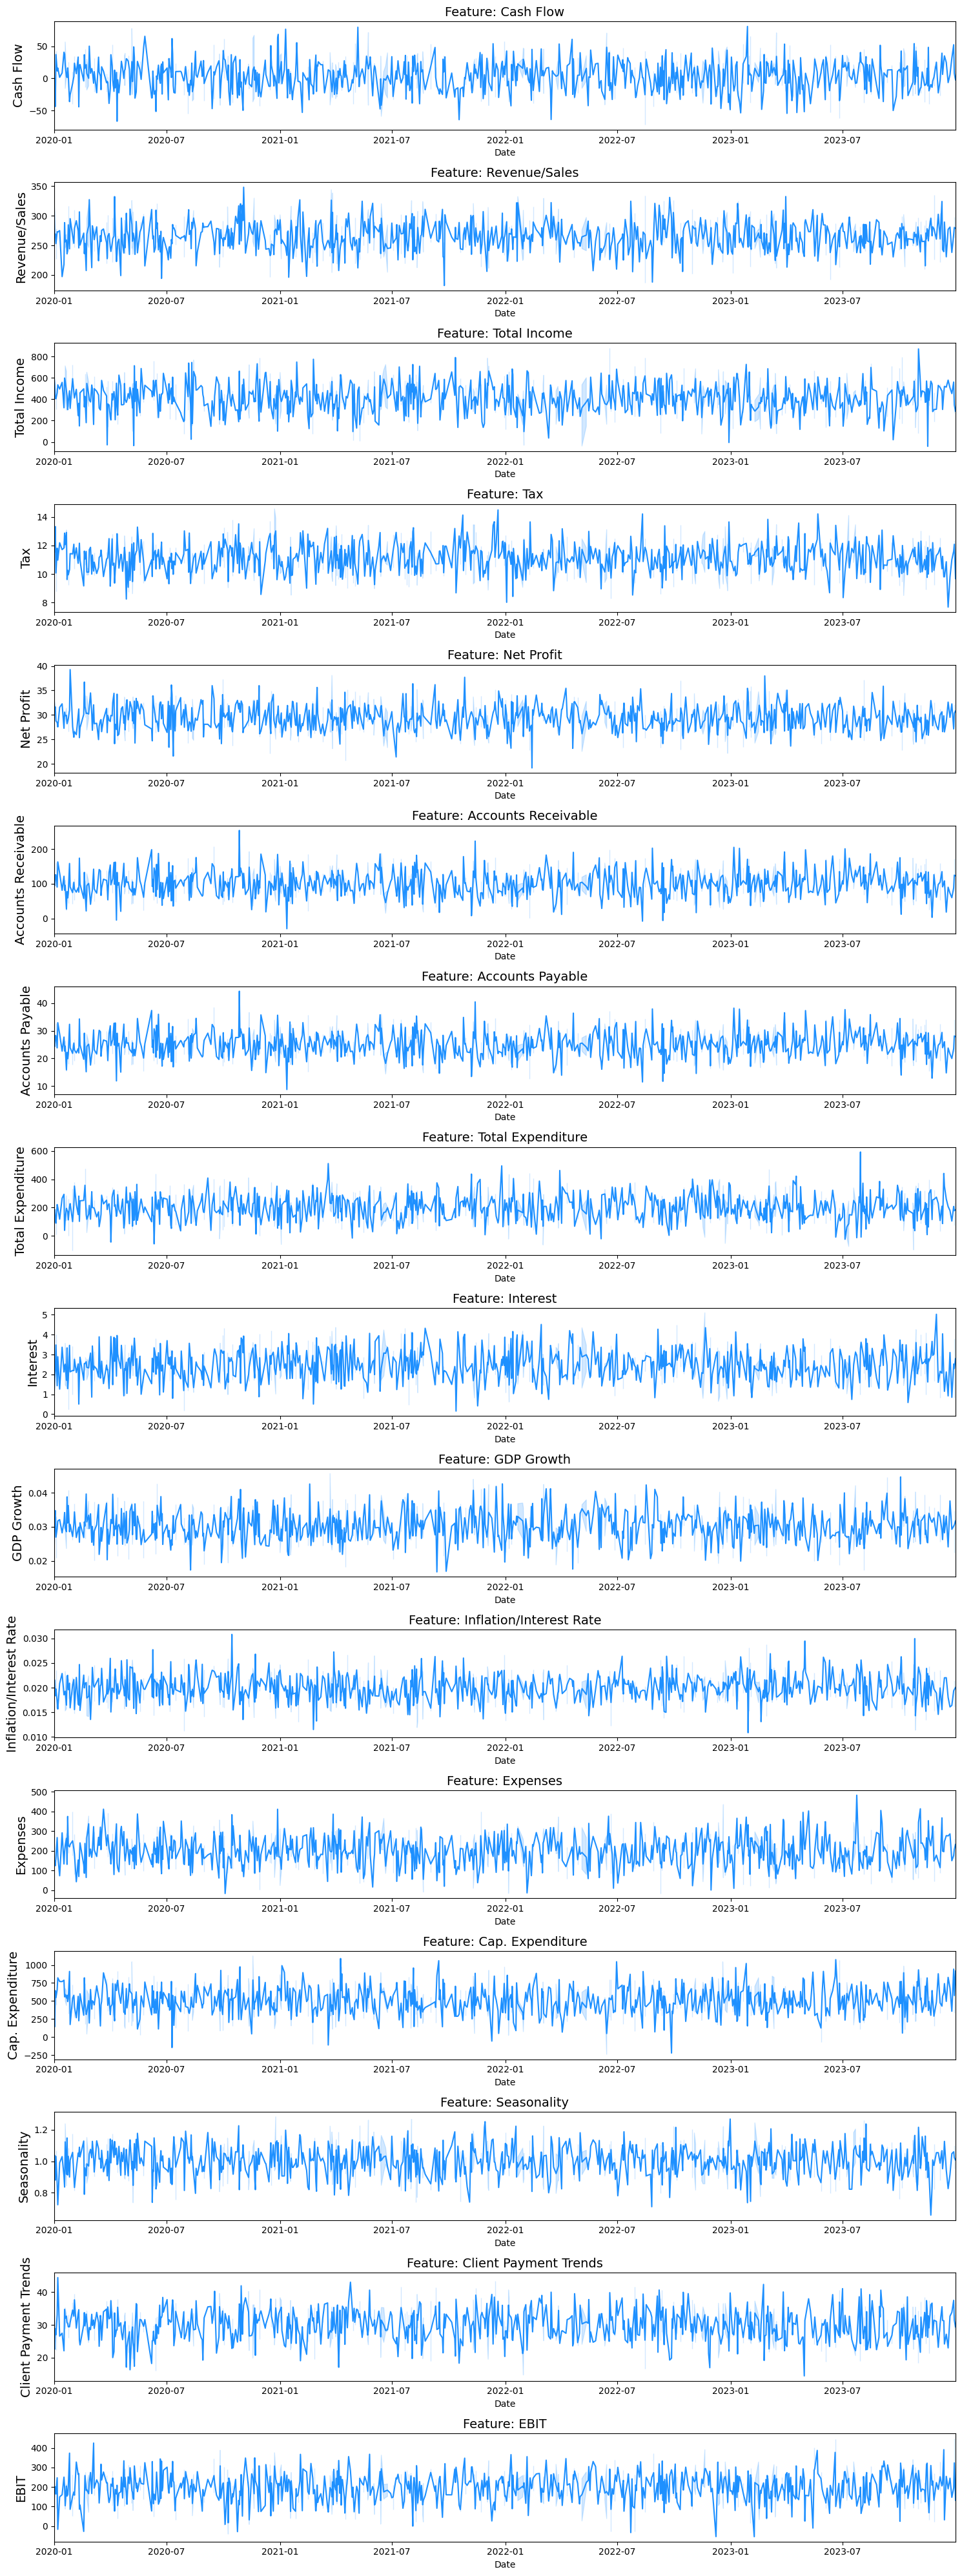

Cash Flow
--------------
ADF Statistic: -20.822805
p-value:  0.0
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
Stationary
Revenue/Sales
--------------
ADF Statistic: -32.773040
p-value:  0.0
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
Stationary
Total Income
--------------
ADF Statistic: -32.047735
p-value:  0.0
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
Stationary
Tax
--------------
ADF Statistic: -32.049933
p-value:  0.0
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
Stationary
Net Profit
--------------
ADF Statistic: -32.119961
p-value:  0.0
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
Stationary
Accounts Receivable
--------------
ADF Statistic: -31.811094
p-value:  0.0
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
Stationary
Accounts Payable
--------------
ADF Statistic: -31.811094
p-value:  0.0
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
Stationary
Total Expenditure
--------------
ADF Statistic: -31.955870
p-value:  0.

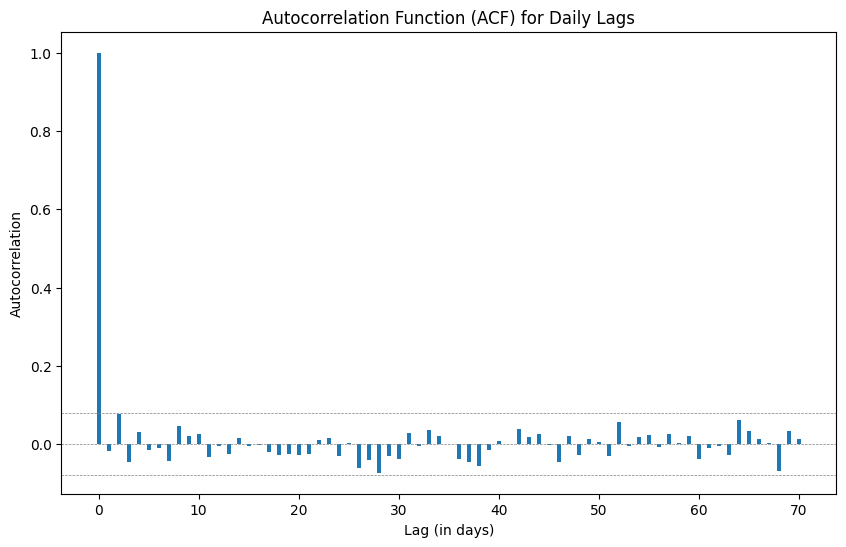

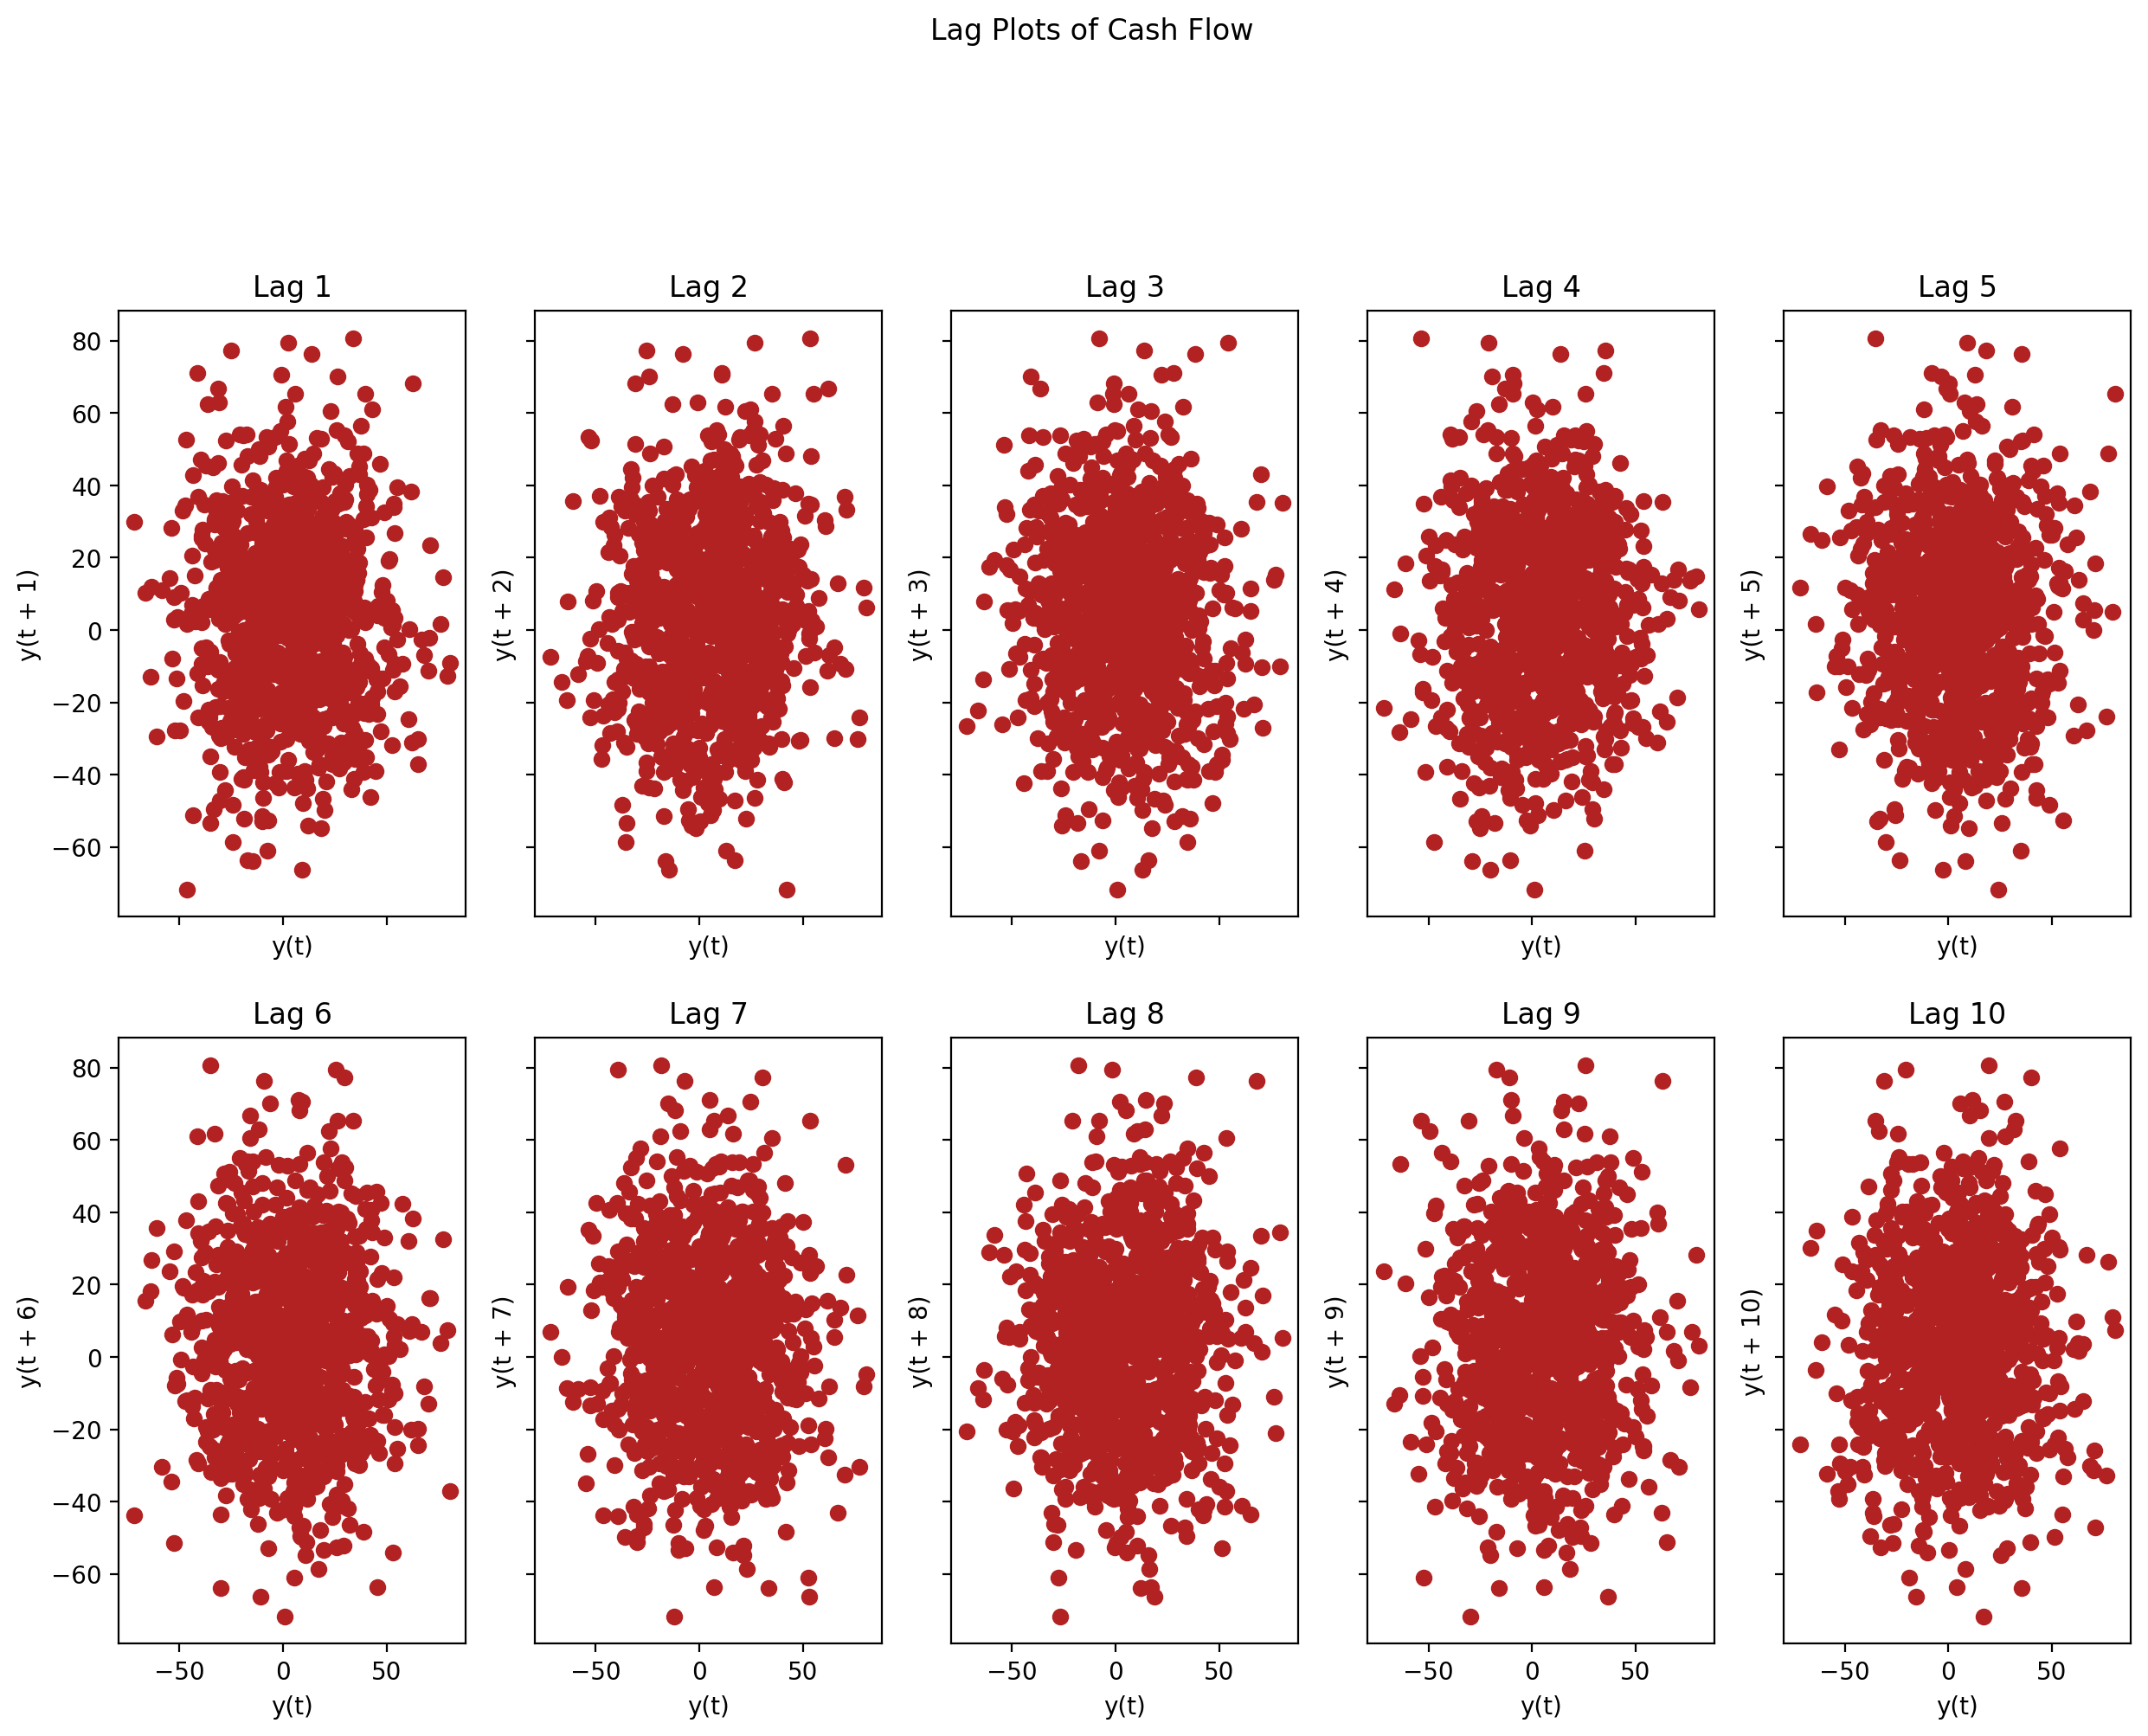

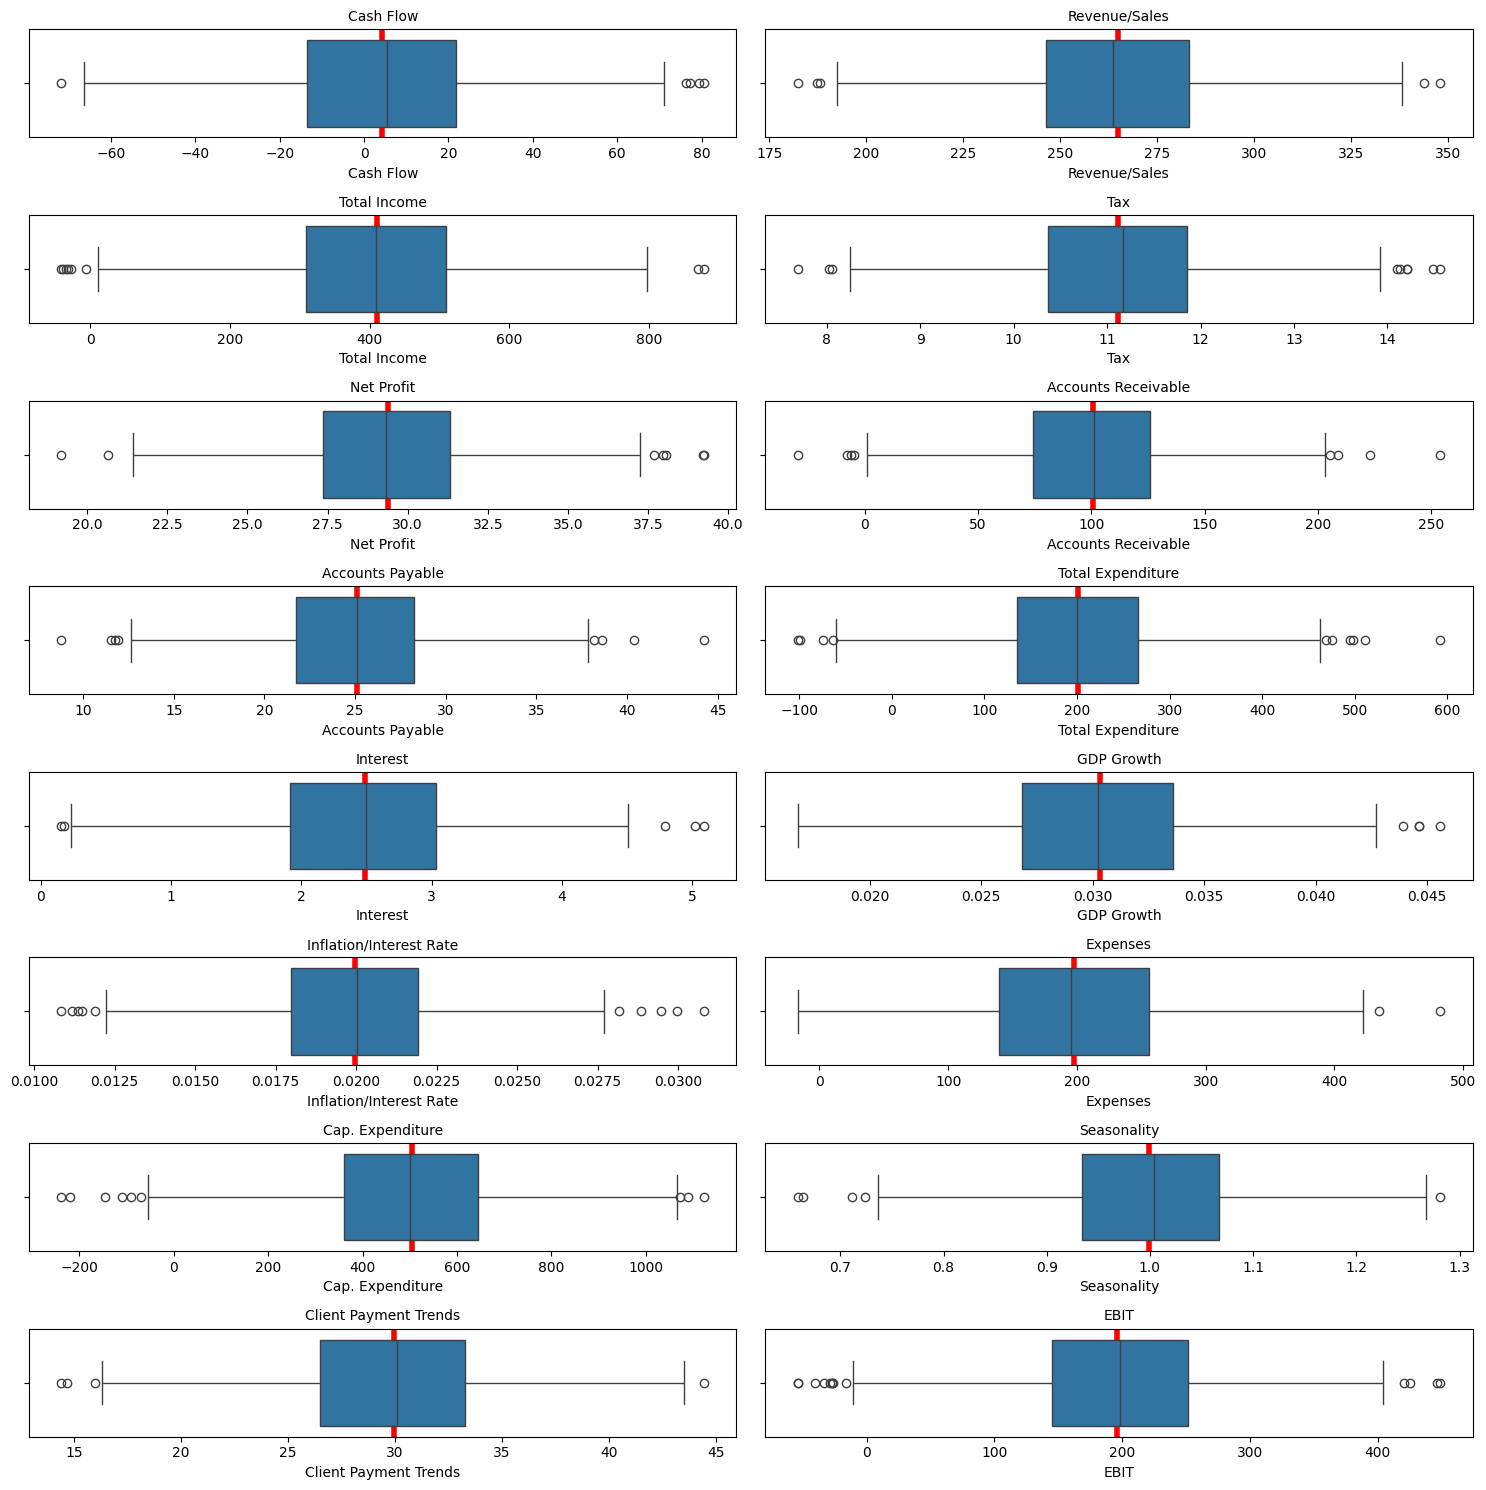

The number of outliers: 5
Max outlier value: 80.64174331
Min outlier value: -71.75751505
Data shape after removing outliers: (893, 17)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/woqjluhc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/3vg4l6_k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89930', 'data', 'file=/tmp/tmppzq3ondl/woqjluhc.json', 'init=/tmp/tmppzq3ondl/3vg4l6_k.json', 'output', 'file=/tmp/tmppzq3ondl/prophet_model87knata3/prophet_model-20240519062110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:21:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:21:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


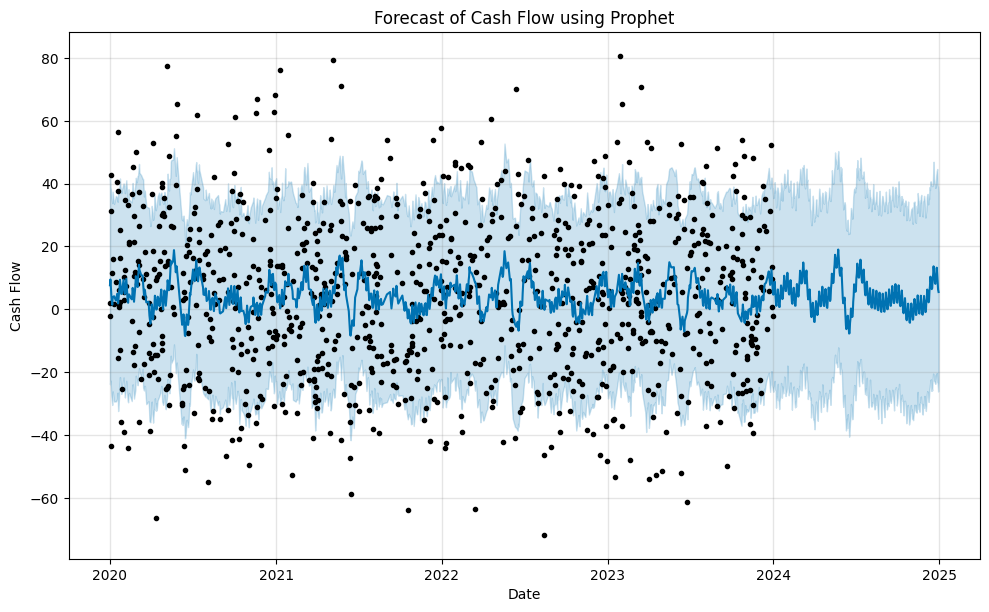

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf
import warnings

warnings.filterwarnings('ignore')

# Load data
data_path = '/content/cash_flow_data_extended.csv'  # Change this to the path of your CSV file
data = pd.read_csv(data_path)

# Data preprocessing
data['Date'] = pd.to_datetime(data['Date'])

# Print out the data types to ensure dates are parsed correctly
print(data.dtypes)

# Fill missing values if necessary
data.fillna(0, inplace=True)

# Check for any duplicates
print("Number of duplicates:", data.duplicated().sum())

# Describe the dataset to understand basic statistics
print(data.describe())

# Visualizations
features = ['Cash Flow', 'Revenue/Sales', 'Total Income', 'Tax', 'Net Profit',
            'Accounts Receivable', 'Accounts Payable', 'Total Expenditure', 'Interest',
            'GDP Growth', 'Inflation/Interest Rate', 'Expenses', 'Cap. Expenditure',
            'Seasonality', 'Client Payment Trends', 'EBIT']

f, ax = plt.subplots(nrows=len(features), ncols=1, figsize=(15, 40))
for i, feature in enumerate(features):
    sns.lineplot(x=data['Date'], y=data[feature], ax=ax[i], color='dodgerblue')
    ax[i].set_title(f'Feature: {feature}', fontsize=14)
    ax[i].set_ylabel(feature, fontsize=14)
    ax[i].set_xlim([data['Date'].min(), data['Date'].max()])

plt.tight_layout()
plt.show()

# Check stationarity
def check_stationarity(series):
    result = adfuller(series.values, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print(f'p-value:  {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

for feature in features:
    print(f'{feature}')
    print('--------------')
    check_stationarity(data[feature])

# Autocorrelation
acf_values, confidence_interval = acf(data['Cash Flow'], nlags=70, alpha=0.05)
plt.figure(figsize=(10, 6))
plt.bar(range(len(acf_values)), acf_values, width=0.4)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=-confidence_interval[1][0], color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=confidence_interval[1][0], color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Lag (in days)')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) for Daily Lags')
plt.show()

# Lag plots
from pandas.plotting import lag_plot

fig, axes = plt.subplots(2, 5, figsize=(15, 10), sharex=True, sharey=True, dpi=200)
m = 1
for i, ax in enumerate(axes.flatten()[:10]):
    lag_plot(data['Cash Flow'], lag=m, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(m))
    m += 1

fig.suptitle('Lag Plots of Cash Flow', y=1.05)
plt.show()

# Boxplots for outliers
fig = plt.figure(figsize=(15, 15))
plt.title('Outliers', fontsize=18)
for i, col in enumerate(features):
    plt.subplot(8, 2, i+1)
    plt.title(col, fontsize=10)
    sns.boxplot(x=data[col])
    plt.axvline(data[col].mean(), linestyle='--', lw=4, zorder=1, color='red')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# Find outliers
def find_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR)))]
    return outliers

outliers = find_outliers(data['Cash Flow'])
print('The number of outliers: ' + str(len(outliers)))
print('Max outlier value: ' + str(outliers.max()))
print('Min outlier value: ' + str(outliers.min()))

# Removing outliers (Optional)
data_cleaned = data.copy()
for col in features:
    outliers = find_outliers(data_cleaned[col])
    data_cleaned = data_cleaned[~data_cleaned[col].isin(outliers)]

print("Data shape after removing outliers:", data_cleaned.shape)

# Example Time Series Analysis with Prophet
prophet_data = data[['Date', 'Cash Flow']].rename(columns={'Date': 'ds', 'Cash Flow': 'y'})

model = Prophet()
model.fit(prophet_data)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

fig = model.plot(forecast)
plt.title('Forecast of Cash Flow using Prophet')
plt.xlabel('Date')
plt.ylabel('Cash Flow')
plt.show()

# Additional models and analyses can be added similarly


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/u6vw5qxy.json


Time Series Analysis for Cash Flow


DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/c1200xqi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20844', 'data', 'file=/tmp/tmppzq3ondl/u6vw5qxy.json', 'init=/tmp/tmppzq3ondl/c1200xqi.json', 'output', 'file=/tmp/tmppzq3ondl/prophet_modelm2u5_nyf/prophet_model-20240519062522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:25:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:25:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


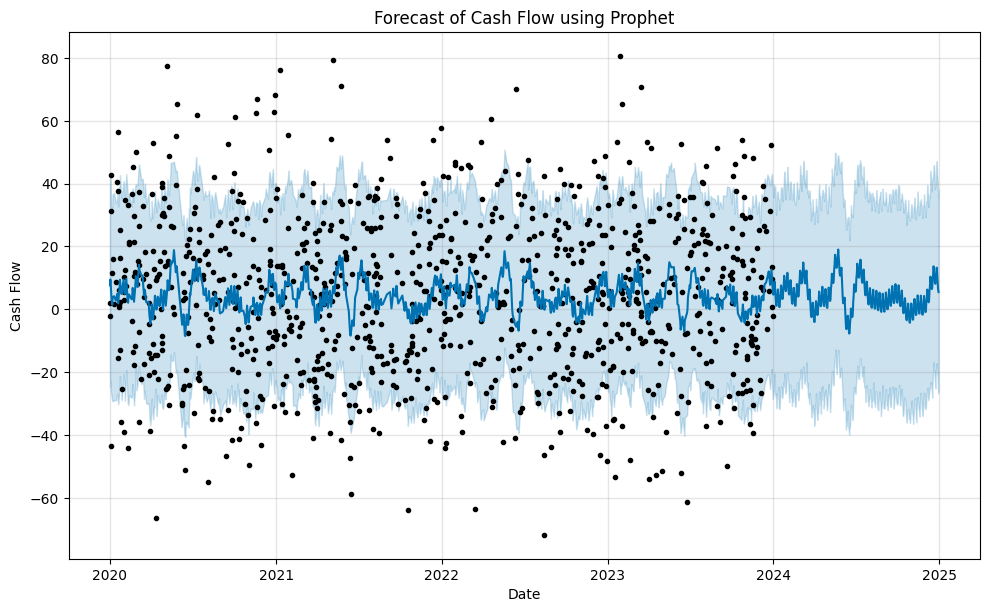

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/isakz43q.json


Time Series Analysis for Revenue/Sales


DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/sihn8ezk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48518', 'data', 'file=/tmp/tmppzq3ondl/isakz43q.json', 'init=/tmp/tmppzq3ondl/sihn8ezk.json', 'output', 'file=/tmp/tmppzq3ondl/prophet_modelofbinj3c/prophet_model-20240519062525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:25:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:25:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


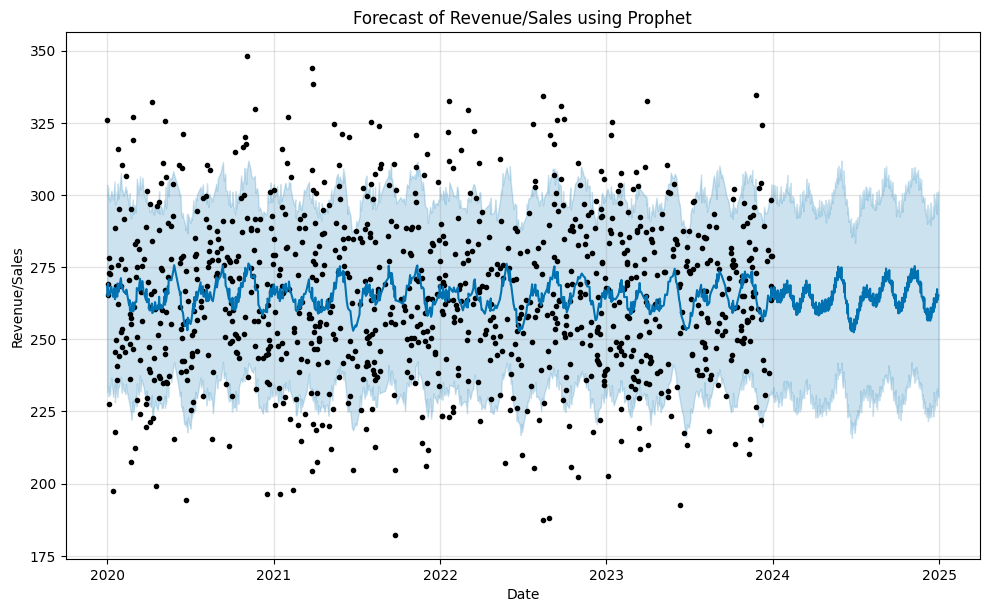

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/6yhki2he.json


Time Series Analysis for Total Income


DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/zn8bz89y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77392', 'data', 'file=/tmp/tmppzq3ondl/6yhki2he.json', 'init=/tmp/tmppzq3ondl/zn8bz89y.json', 'output', 'file=/tmp/tmppzq3ondl/prophet_modelossk316h/prophet_model-20240519062529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:25:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:25:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


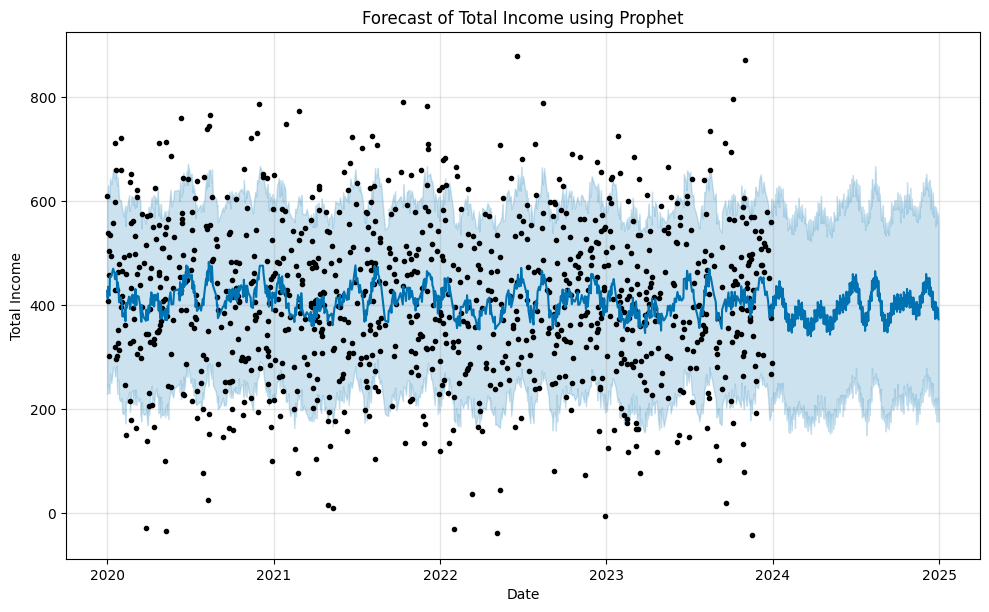

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/nvt5xdp6.json


Time Series Analysis for Tax


DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/mfb_v17i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87525', 'data', 'file=/tmp/tmppzq3ondl/nvt5xdp6.json', 'init=/tmp/tmppzq3ondl/mfb_v17i.json', 'output', 'file=/tmp/tmppzq3ondl/prophet_modelijmw2g4u/prophet_model-20240519062532.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:25:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:25:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


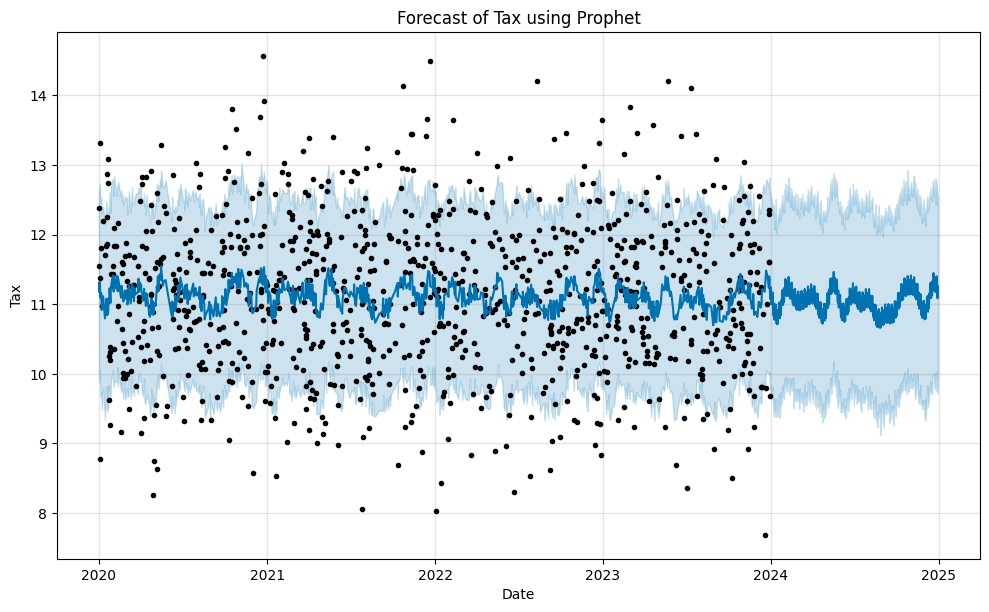

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/_kvoh9vn.json


Time Series Analysis for Net Profit


DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/qjf9mw5b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60610', 'data', 'file=/tmp/tmppzq3ondl/_kvoh9vn.json', 'init=/tmp/tmppzq3ondl/qjf9mw5b.json', 'output', 'file=/tmp/tmppzq3ondl/prophet_modeln3byqtx0/prophet_model-20240519062534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:25:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:25:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


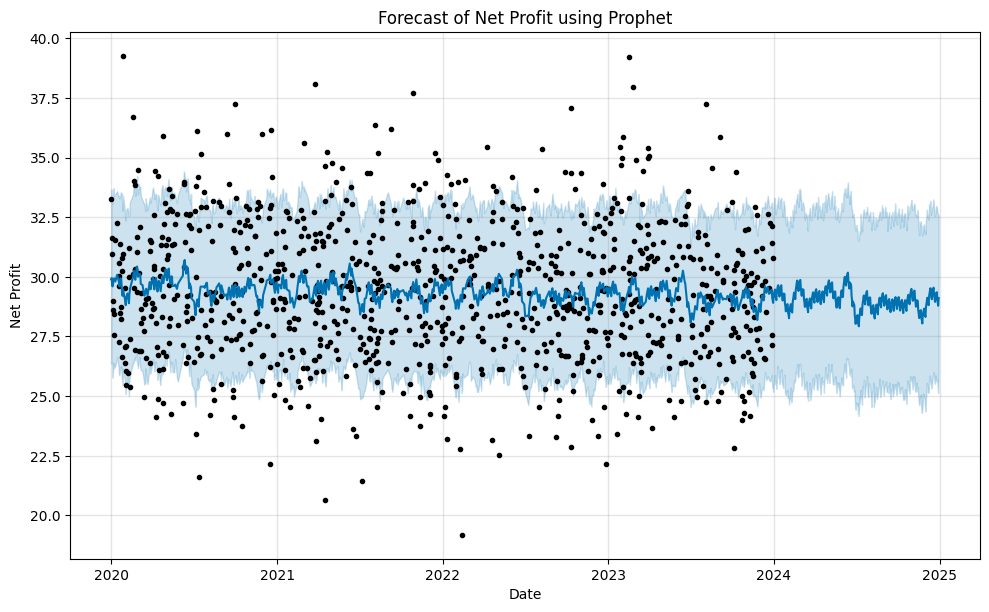

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/n49dwmqw.json


Time Series Analysis for Accounts Receivable


DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/crvikeco.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51145', 'data', 'file=/tmp/tmppzq3ondl/n49dwmqw.json', 'init=/tmp/tmppzq3ondl/crvikeco.json', 'output', 'file=/tmp/tmppzq3ondl/prophet_modelij2rkaye/prophet_model-20240519062537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:25:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:25:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


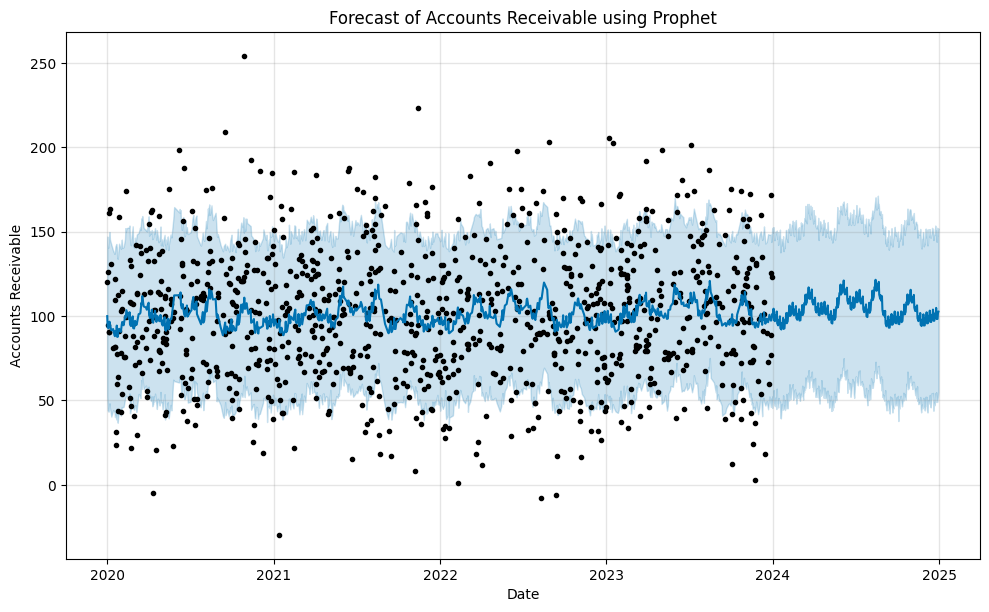

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/7elkb_9k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/j4zw0zmu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42057', 'data', 'file=/tmp/tmppzq3ondl/7elkb_9k.json', 'init=/tmp/tmppzq3ondl/j4zw0zmu.json', 'output', 'file=/tmp/tmppzq3ondl/prophet_modelk923v2v9/prophet_model-20240519062538.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:25:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Time Series Analysis for Accounts Payable


06:25:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


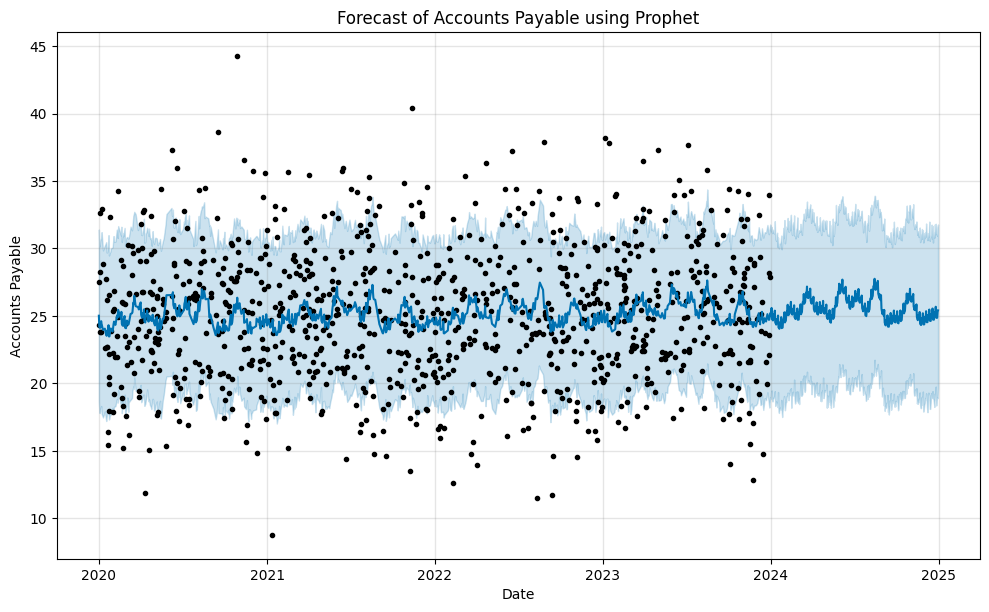

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/vi500dmh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/0cfw9btt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76117', 'data', 'file=/tmp/tmppzq3ondl/vi500dmh.json', 'init=/tmp/tmppzq3ondl/0cfw9btt.json', 'output', 'file=/tmp/tmppzq3ondl/prophet_modelfd6n7lus/prophet_model-20240519062539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:25:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Time Series Analysis for Total Expenditure


06:25:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


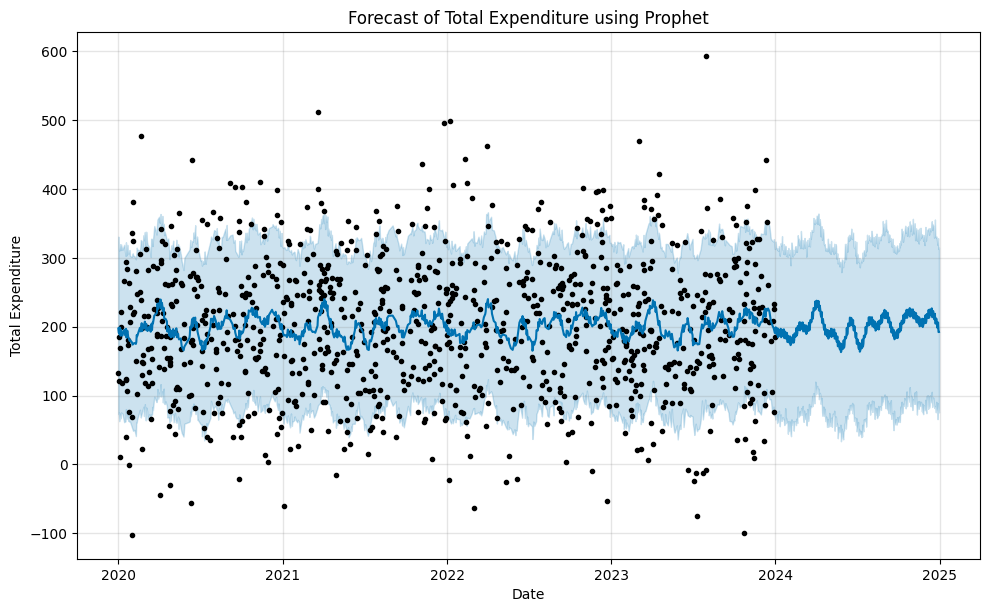

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/3vok3n9b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/1_djsll9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6757', 'data', 'file=/tmp/tmppzq3ondl/3vok3n9b.json', 'init=/tmp/tmppzq3ondl/1_djsll9.json', 'output', 'file=/tmp/tmppzq3ondl/prophet_modeluw5ede4x/prophet_model-20240519062540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:25:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Time Series Analysis for Interest


06:25:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


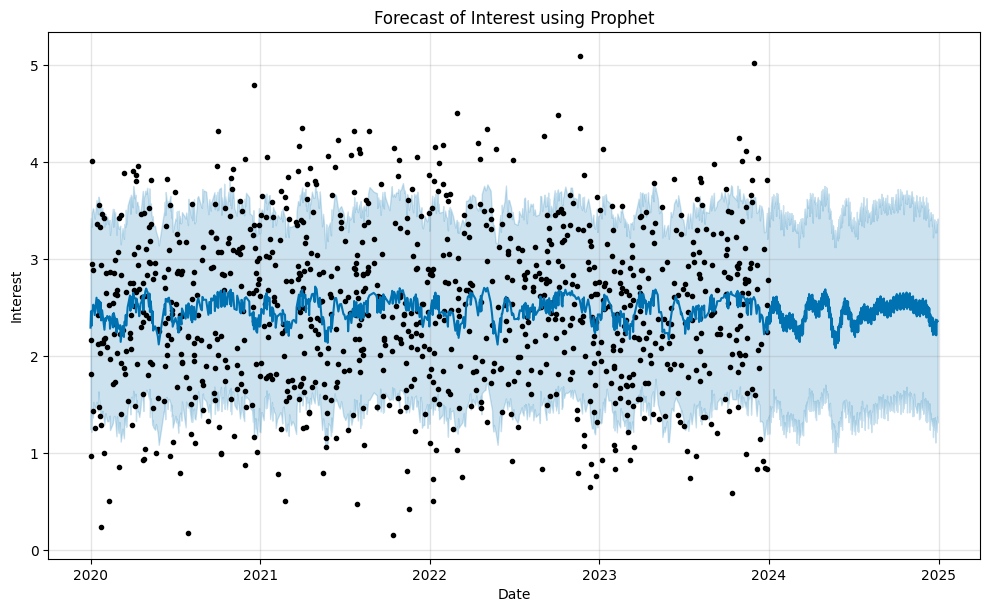

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/0rv72m3z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/rnt5u478.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96649', 'data', 'file=/tmp/tmppzq3ondl/0rv72m3z.json', 'init=/tmp/tmppzq3ondl/rnt5u478.json', 'output', 'file=/tmp/tmppzq3ondl/prophet_modeluhli77k6/prophet_model-20240519062541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:25:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Time Series Analysis for GDP Growth


06:25:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


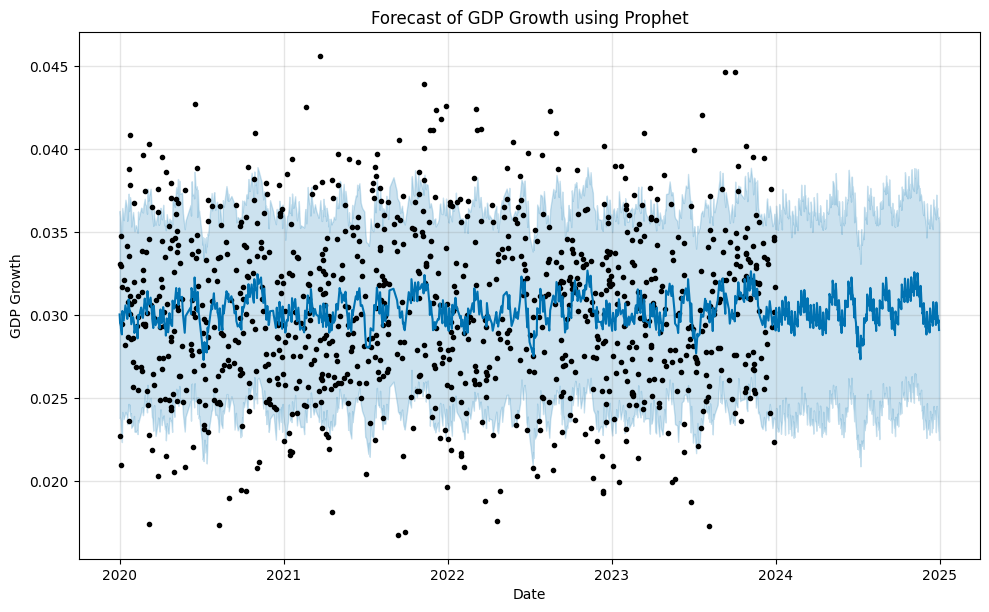

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/8710e_5x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/7ljcapek.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41282', 'data', 'file=/tmp/tmppzq3ondl/8710e_5x.json', 'init=/tmp/tmppzq3ondl/7ljcapek.json', 'output', 'file=/tmp/tmppzq3ondl/prophet_model7rxfvae7/prophet_model-20240519062542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:25:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Time Series Analysis for Inflation/Interest Rate


06:25:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


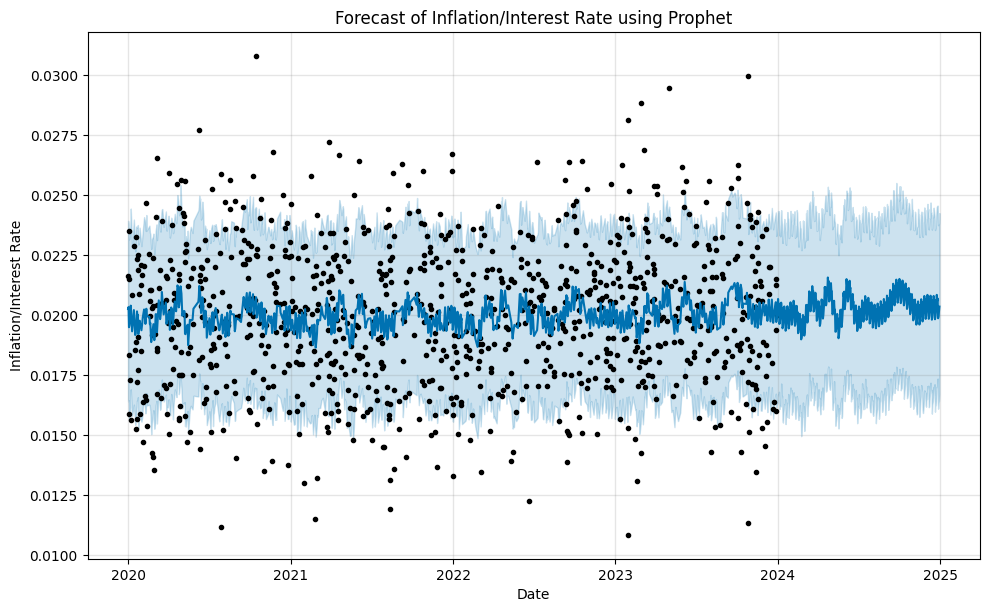

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/x38v2z0v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/chfyiakz.json
DEBUG:cmdstanpy:idx 0


Time Series Analysis for Expenses


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9419', 'data', 'file=/tmp/tmppzq3ondl/x38v2z0v.json', 'init=/tmp/tmppzq3ondl/chfyiakz.json', 'output', 'file=/tmp/tmppzq3ondl/prophet_modelahkzzzv4/prophet_model-20240519062543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:25:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:25:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


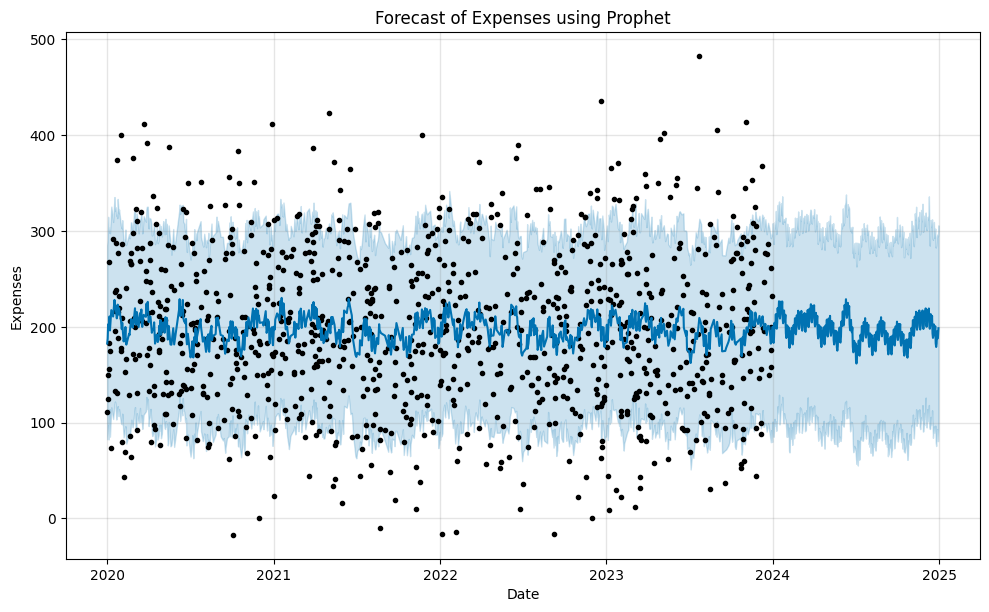

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/4lffl_g6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/_ajgaeqe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16806', 'data', 'file=/tmp/tmppzq3ondl/4lffl_g6.json', 'init=/tmp/tmppzq3ondl/_ajgaeqe.json', 'output', 'file=/tmp/tmppzq3ondl/prophet_modelfh12jv5l/prophet_model-20240519062544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:25:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Time Series Analysis for Cap. Expenditure


06:25:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


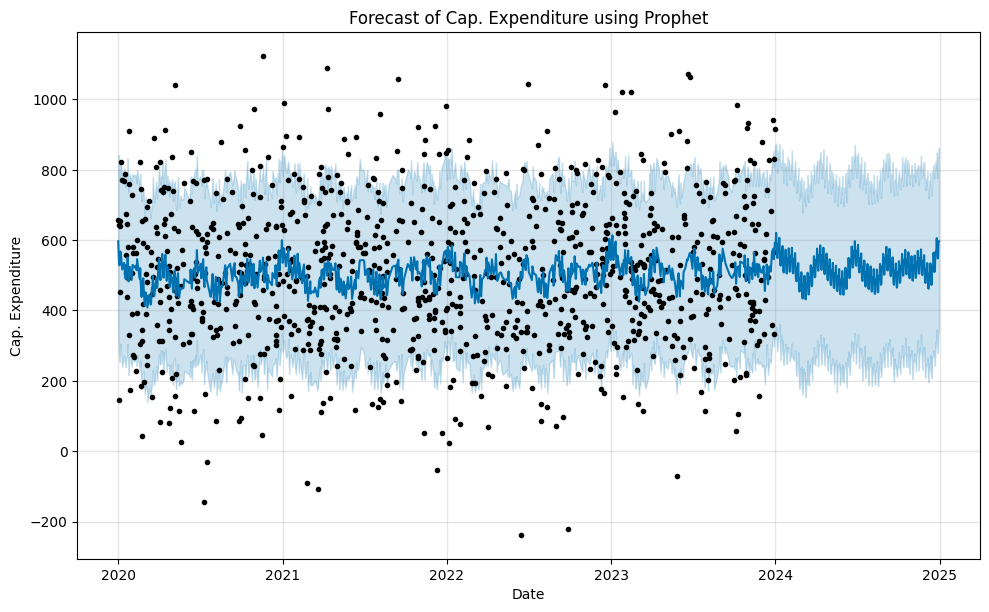

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/28g3hfyj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/t84c55k_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20323', 'data', 'file=/tmp/tmppzq3ondl/28g3hfyj.json', 'init=/tmp/tmppzq3ondl/t84c55k_.json', 'output', 'file=/tmp/tmppzq3ondl/prophet_modelx0nttbqe/prophet_model-20240519062545.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:25:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Time Series Analysis for Seasonality


06:25:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


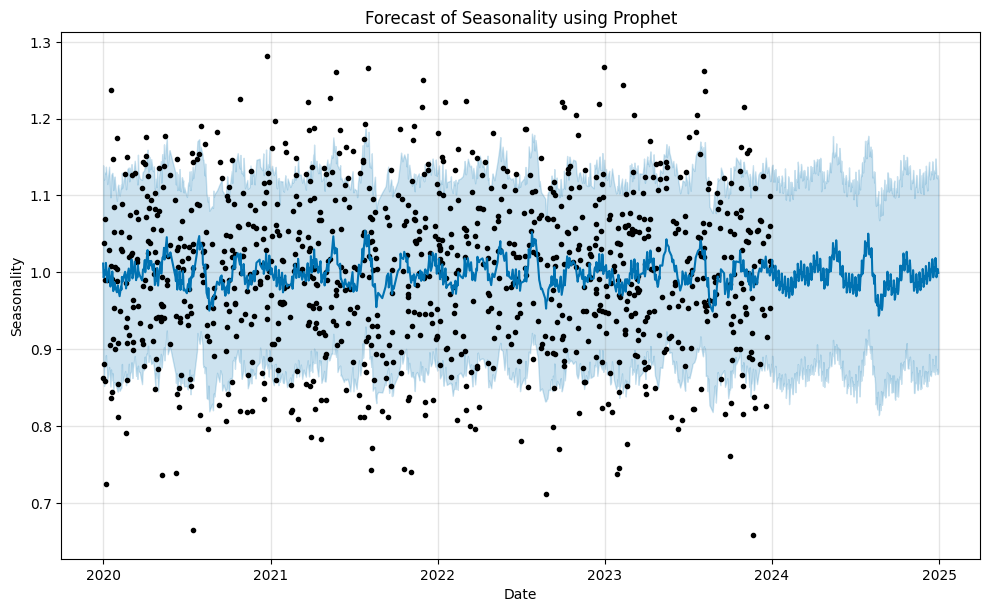

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/98d8yxgr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/nt20ehxm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20797', 'data', 'file=/tmp/tmppzq3ondl/98d8yxgr.json', 'init=/tmp/tmppzq3ondl/nt20ehxm.json', 'output', 'file=/tmp/tmppzq3ondl/prophet_modelvp7k62n9/prophet_model-20240519062546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:25:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Time Series Analysis for Client Payment Trends


06:25:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


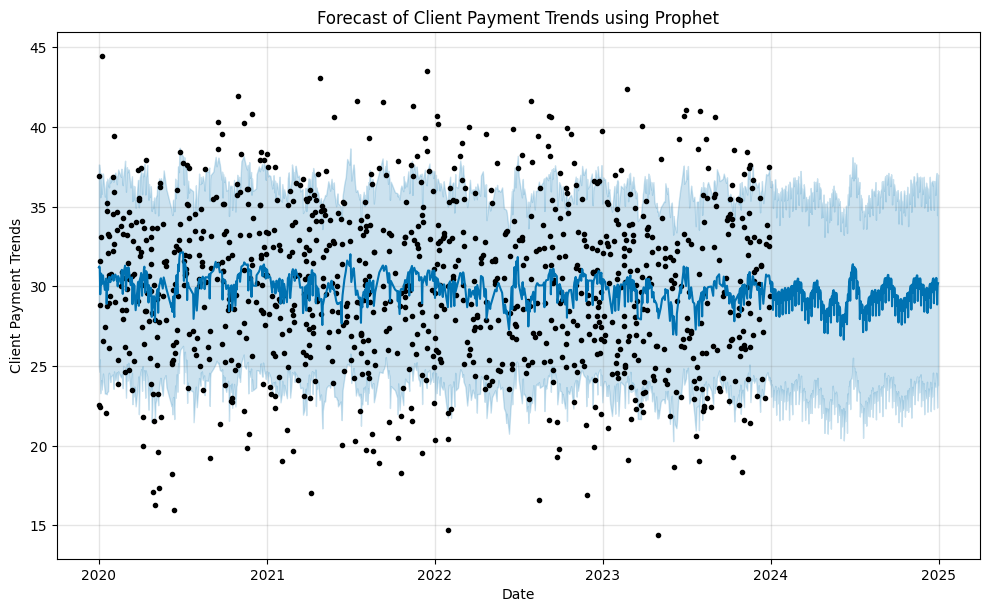

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/ecvwwdgi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppzq3ondl/126_jn21.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46171', 'data', 'file=/tmp/tmppzq3ondl/ecvwwdgi.json', 'init=/tmp/tmppzq3ondl/126_jn21.json', 'output', 'file=/tmp/tmppzq3ondl/prophet_modelzcshl2vu/prophet_model-20240519062547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:25:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Time Series Analysis for EBIT


06:25:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


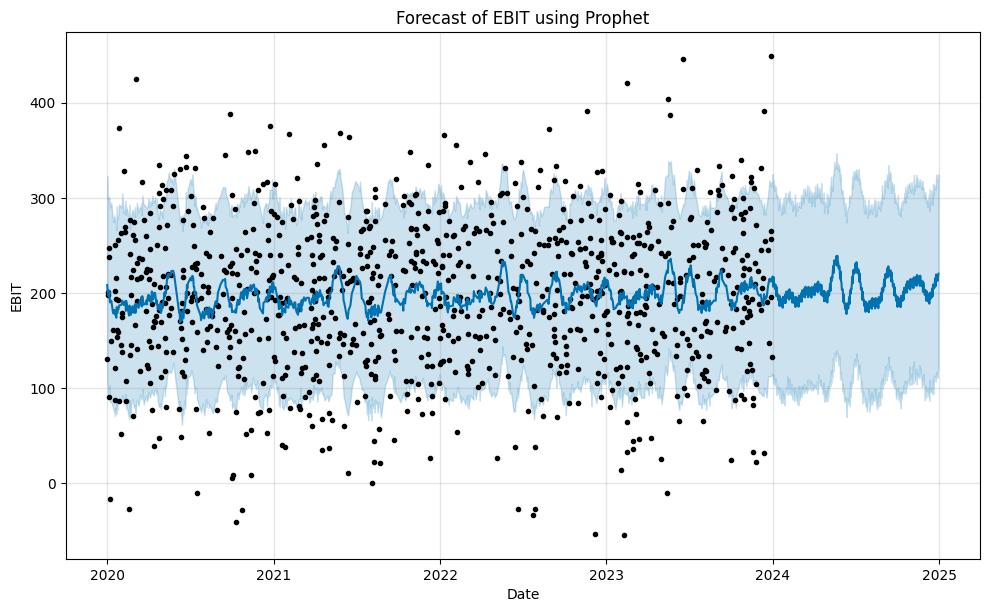

In [ ]:
# Time Series Analysis with Prophet for Multiple Features
features = ['Cash Flow', 'Revenue/Sales', 'Total Income', 'Tax', 'Net Profit',
            'Accounts Receivable', 'Accounts Payable', 'Total Expenditure', 'Interest',
            'GDP Growth', 'Inflation/Interest Rate', 'Expenses', 'Cap. Expenditure',
            'Seasonality', 'Client Payment Trends', 'EBIT']

for feature in features:
    print(f"Time Series Analysis for {feature}")
    prophet_data = data[['Date', feature]].rename(columns={'Date': 'ds', feature: 'y'})
    model = Prophet()
    model.fit(prophet_data)
    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)

    fig = model.plot(forecast)
    plt.title(f'Forecast of {feature} using Prophet')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.show()


In [ ]:
# Additional Machine Learning Models
from sklearn.model_selection import train_test_split

# Split data into train and test sets
train, test = train_test_split(data_cleaned, test_size=0.2, shuffle=False)

# Example: Support Vector Regression (SVR)
svr = SVR(kernel='linear')
predictions = {}

for feature in features:
    X_train = np.array(train.index).reshape(-1, 1)
    y_train = train[feature].values

    X_test = np.array(test.index).reshape(-1, 1)
    y_test = test[feature].values

    svr.fit(X_train, y_train)
    predictions[feature] = svr.predict(X_test)

# Evaluate predictions
for feature, preds in predictions.items():
    print(f"Feature: {feature}")
    mae = mean_absolute_error(test[feature], preds)
    mape = mean_absolute_percentage_error(test[feature], preds)
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}")


Feature: Cash Flow
MAE: 19.987414298031283
MAPE: 1.1242411564353902
Feature: Revenue/Sales
MAE: 20.28055403714524
MAPE: 0.07738174145409747
Feature: Total Income
MAE: 113.43778619129269
MAPE: 0.48291481996299795
Feature: Tax
MAE: 0.8529976059169928
MAPE: 0.07829724256944225
Feature: Net Profit
MAE: 2.179992014587353
MAPE: 0.0761598453345217
Feature: Accounts Receivable
MAE: 31.878797163521998
MAPE: 0.5569977085720417
Feature: Accounts Payable
MAE: 3.964073010641424
MAPE: 0.15786903598405125
Feature: Total Expenditure
MAE: 76.30544170655135
MAPE: 1.1662792356285545
Feature: Interest
MAE: 0.6457273670014838
MAPE: 0.35404608989739933
Feature: GDP Growth
MAE: 0.0036090209217877088
MAPE: 0.12119293636258788
Feature: Inflation/Interest Rate
MAE: 0.002291251215083799
MAPE: 0.1168761792203962
Feature: Expenses
MAE: 70.45401348672073
MAPE: 0.6183381782182562
Feature: Cap. Expenditure
MAE: 151.90965554360054
MAPE: 0.4217740853125226
Feature: Seasonality
MAE: 0.07476649154396289
MAPE: 0.075944972